In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import plot_importance
from matplotlib import pyplot

In [3]:
raw_data = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [4]:
raw_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

In [5]:
NumDealsPurchases_ser = raw_data['NumDealsPurchases']
AcceptedCmp1_ser = raw_data['AcceptedCmp1']
AcceptedCmp2_ser = raw_data['AcceptedCmp2']
AcceptedCmp3_ser = raw_data['AcceptedCmp3']
AcceptedCmp4_ser = raw_data['AcceptedCmp4']
AcceptedCmp5_ser = raw_data['AcceptedCmp5'] 
Response_ser = raw_data['Response']

In [6]:
promotion_df = pd.concat([NumDealsPurchases_ser, AcceptedCmp1_ser, AcceptedCmp2_ser, AcceptedCmp3_ser, AcceptedCmp4_ser, AcceptedCmp5_ser, Response_ser], axis=1)
promotion_df   
# pd.concat simply stacks multiple DataFrame together either vertically, or stitches horizontally after aligning on index. 

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,3,0,0,0,0,0,1
1,2,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2235,2,0,0,0,0,0,0
2236,7,1,0,0,0,0,0
2237,1,0,0,0,1,0,0
2238,2,0,0,0,0,0,0


In [7]:
promotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   NumDealsPurchases  2240 non-null   int64
 1   AcceptedCmp1       2240 non-null   int64
 2   AcceptedCmp2       2240 non-null   int64
 3   AcceptedCmp3       2240 non-null   int64
 4   AcceptedCmp4       2240 non-null   int64
 5   AcceptedCmp5       2240 non-null   int64
 6   Response           2240 non-null   int64
dtypes: int64(7)
memory usage: 122.6 KB


The data looks clean

In [8]:
# splitting the dataset
X = promotion_df.iloc[:,0:6]
Y = promotion_df.iloc[:,6]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
# i took 33% as test data set and the remaining as training data set thats why test_size=0.33
# in random_state, i just mentioned the random value. Just a random value.

In [9]:
# fit model on training data
model = XGBClassifier()
eval_set = [(X_test,y_test)]
model.fit(X_train,y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# early_stopping_rounds = 10 ----> means that that the model has to improve at least once in 10 rounds.

[0]	validation_0-logloss:0.54503
[1]	validation_0-logloss:0.46590
[2]	validation_0-logloss:0.42177
[3]	validation_0-logloss:0.39505
[4]	validation_0-logloss:0.38066
[5]	validation_0-logloss:0.37190
[6]	validation_0-logloss:0.36758
[7]	validation_0-logloss:0.36503
[8]	validation_0-logloss:0.36383
[9]	validation_0-logloss:0.36368
[10]	validation_0-logloss:0.36427
[11]	validation_0-logloss:0.36526
[12]	validation_0-logloss:0.36586
[13]	validation_0-logloss:0.36619
[14]	validation_0-logloss:0.36669
[15]	validation_0-logloss:0.36696
[16]	validation_0-logloss:0.36714
[17]	validation_0-logloss:0.36758
[18]	validation_0-logloss:0.36817


C:\Users\prasa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

* The model went on till 19 iterations and stopped because it was not improving.
* The best iteration was the 9th one: validation_0-logloss:0.36368

In [10]:
# make predictions for test data
predictions = model.predict(X_test)

In [11]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy*100.0))

Accuracy: 86.35%


## Feature Importance using XGBoost

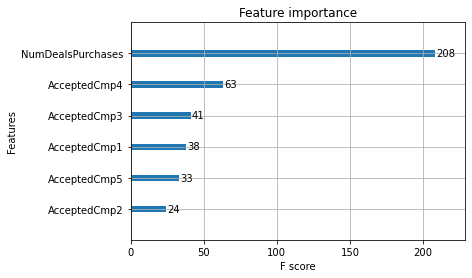

In [12]:
# plot feature importance
plot_importance(model)
pyplot.show()

## Confusion Matrix Plot

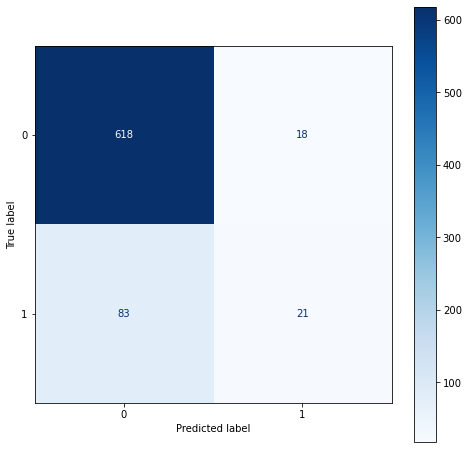

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

XGBoost correctly predicted almost 86% of the promotions for the customers. 

## SHAP Analysis

In [14]:
import shap   #package used to calculate shap values

### SHapley Additive exPlanations
 The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the "payout" (= the prediction) among the features. 

In [15]:
explainerxgbc = shap.TreeExplainer(model)
shap_values_XGBoost_test = explainerxgbc.shap_values(X_test)
shap_values_XGBoost_train = explainerxgbc.shap_values(X_train)

## SHAP Summary Plot

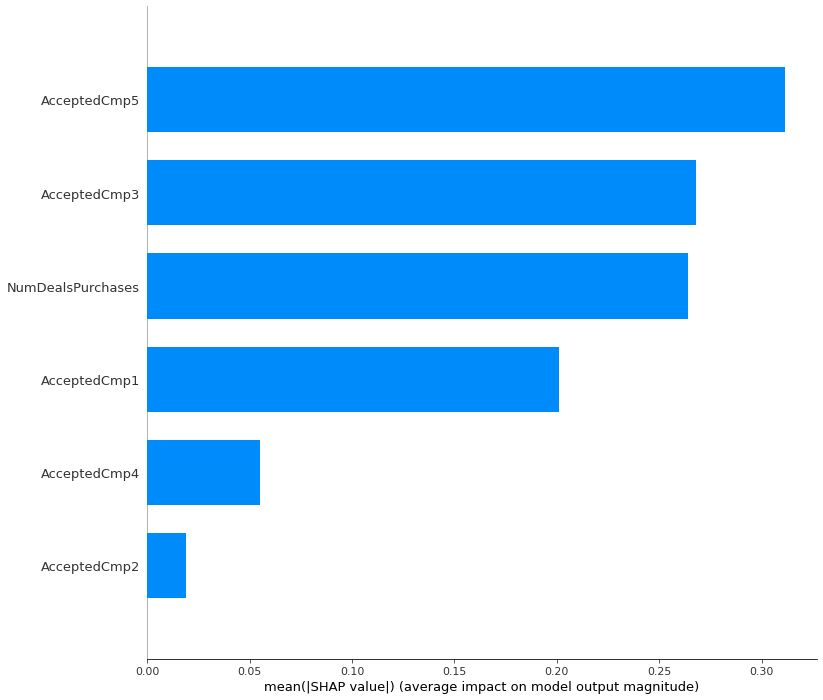

In [16]:
shap.summary_plot(shap_values_XGBoost_train, X_train, plot_type="bar",plot_size=(12,12))

SHAP feature importance is easy to explain. Features with larger values are important. 

As we have seen from the feature importance:

* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* NumDealsPurchases: Number of purchases made with a discount
     
     These are the important features based on the XGboost model we have selected.

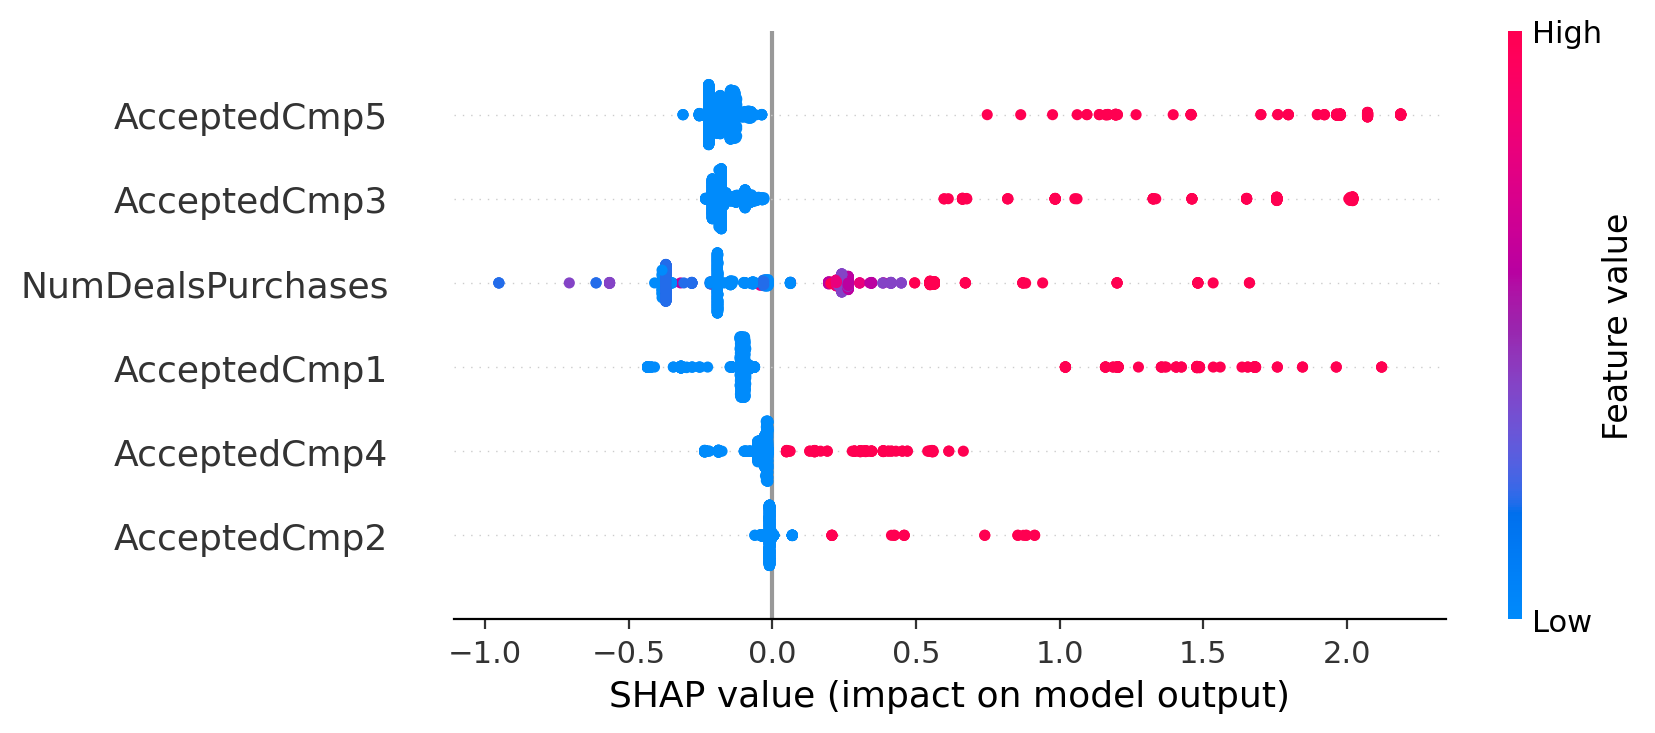

In [17]:
fig = plt.subplots(figsize=(6,6),dpi=200)

ax = shap.summary_plot(shap_values_XGBoost_train, X_train,plot_type="dot")

## SHAP Force Plot

In [18]:
shap.initjs()
shap.force_plot(explainerxgbc.expected_value, shap_values_XGBoost_test[0,:], X_test.iloc[0,:])

* The baseline is -1.75
* The number of purchases made with a discount increases the prediction.

#### My recommendation to business for the next round of campaigns - 

As campaigns 5 and 3 performed well. People acceped the offer very well. So, we can adopt the techniques which were used in campaign 5 & 3 for the next round of campaign. They will produce less risk than any others.